# Dense & Deep Neural Networks

We've only been studying the single neuron model thus far. Neural networks is literally an expansion of these concepts. Instead of a single nueorn, neural networks contain multiple layers of interconnected neurons. Each hidden layer of neurons receive input from the last layer. The output of the final layer is the final output of the network as a whole. This algorithm is inspired by the human brain, and definitely a bit more realistic than a single neuron model!

Neural networks work for both regression and classification tasks. In particular, neural networks are a great strategy for models that aren't easily linearly separable (and even look a little wonky :)), and it can pretty much learn any dataset (but we may run into the problem of overfitting). Neural networks can also perform dimensionality reduction, meaning we can take a multidimensional matrix and reduce it down to a smaller dimension such that its easier to work iwth and digest.

# How does a neural network actually work?
Each individual node acts as its own single neuron model, composed of weights and biases and an output. This time, however, we are dealing with an entire layer of nodes. For a single neuron, the $z$ output is the same: $z = b+ w_1x_1 + w_2x_2 +...w_nx_n$. This scalar output effectively functions as a new input for the next layer of neurons- a phase called *feed-forward*. We can do this process for each layer until an output is arrived at. Passing a signal through these layers creates a highly composite function that approximates a target function $f$.

The Univervsal Approximation Theorem summarizes this pretty well. Essentially, the use of a nonlinear activation function (i.e.: Sigmoid!?) within the neural network can approximate any "reasonable" function, given that a network has at least one hidden layer of nonlinear units and a single linear output. Without this component of nonlinearity, the model would be reduced down to linear regression and it would not be able to learn the complex relationships between points. For example, we can use the Sigmoid function, but other common functions include: tanh, RELU, and Maxout. 

The next big step to the neural network algorithm is the cost function, dubbed *backpropogating*. Similar to past algorithms, we can use MSE or other difference minimization cost functions. We find the gradient of the cost function and update with a learning rate, as backpropogation is a method to adjust the weights from the errors found during learning. Errors from the ouput are sent backward through the network to adjust the weights and bisases. This iteration continues until the cost function is minimized and a final prediction is spit out, so this is just a large scale version of our single neuron model!

Adjustments to hyperparameters like the numbre of layers, nodes per layer, and the type of activation function can definitely influence results and improve accuracy.

Here is an image to help you visualize:
![nice](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/3a/b8/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork.component.simple-narrative-xl.ts=1708454686214.png/content/adobe-cms/us/en/topics/neural-networks/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/simple_narrative_2144712998/image)
so sexy :)


Neural networks are extensively powerful, but they also have their own limitations. For one, neural networks are computationally expensive and have been criticized to require too many training samples in order to be suitable for real-world operation. As such, they also tend to be prone to overfitting and require careful parameter tuning. Still, these remain a powerful tool for solving ML problems. 


Neural networks are used across many industries, including medical image classifications, financial predictions, chemical compound identification, and many,many more. It's a huge element of supervised learning. In this notebook, we will utilize the TensorFlow package (so we don't have to write our own dense class!) to analyze the diabetes dataset.


# Application

[Diabetes Dataset Source](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv)

(Read more specifics in the README file)

In this notebook, we will be attempting to classify if someone is healthy, prediabetic, or diabetic via all 21 other variables.

In [83]:
#import all necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix


Luckily for us, we don't have to one-hot encode anything in the diabetes dataset, as all data is measured by numerical scales! The doctors really had our backs on that one.

In [84]:
df= pd.read_csv(r"C:\Users\faith\inde 577\INDE577\577repo\Supervised Learning\Datasets\diabetes_012_health_indicators_BRFSS2015.csv")
df= df.dropna()

sns.set_theme()

X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
y = df.iloc[:, 0].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



I deliberated much over what type of neural network I should use, but I ultimately settled on the one below, which is an alternation between Dense and Dropout layers. The first dense layer has 64 units and uses the rectified linear unit (ReLu) activation function for faster calculations. I decided to add the dropout layer to try and decrease overfitting. Lastly, a final dense layer is add with 20 units and uses the softmax activation function.

In [85]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='softmax')  # Output layer with 3 neurons and softmax activation
])

I chose to use 3 epochs because I am impatient, but more is definitely recommnded!

In [86]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.5),
              loss='mse',
              metrics=['accuracy'])

#model.fit(X_train, y_train, epochs=3, validation_split=0.3)
model.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                1408      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 20)                1300      
                                                                 
Total params: 2708 (10.58 KB)
Trainable params: 2708 (10.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
model.evaluate(X_test, y_test, verbose= 2)

2379/2379 - 1s - loss: 0.5563 - accuracy: 0.0088 - 1s/epoch - 579us/step


[0.5563338398933411, 0.00880374200642109]

Let's analyze how this code does in terms of errors and accuracy.

2379/2379 [==============================] - 1s 593us/step


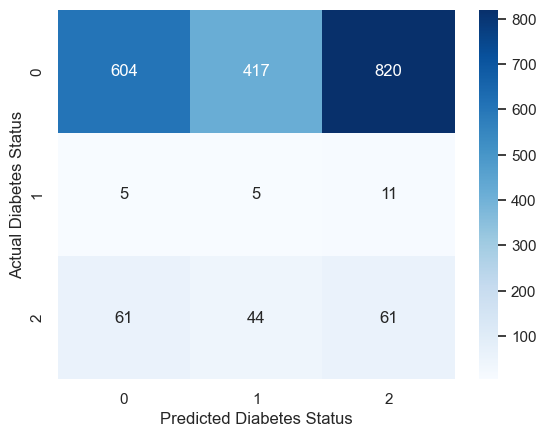

In [88]:
#Creating a confusion matrix
y_pred_prob= model.predict(X_test)
ypred = np.argmax(y_pred_prob, axis=1)
cm = confusion_matrix(y_test, ypred, labels=[0, 1, 2])

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted Diabetes Status')
plt.ylabel('Actual Diabetes Status')

# Show the plot
plt.show()


Looks like it's predicting almost perfectly! This is a signifer of overfitting.

Epoch 1/5
3885/3885 [==============================] - 6s 1ms/step - loss: 0.5956 - accuracy: 0.0067 - val_loss: 0.5863 - val_accuracy: 0.0058
Epoch 2/5
3885/3885 [==============================] - 7s 2ms/step - loss: 0.5957 - accuracy: 0.0078 - val_loss: 0.5863 - val_accuracy: 0.0089
Epoch 3/5
3885/3885 [==============================] - 6s 1ms/step - loss: 0.5957 - accuracy: 0.0080 - val_loss: 0.5863 - val_accuracy: 0.0084
Epoch 4/5
3885/3885 [==============================] - 5s 1ms/step - loss: 0.5957 - accuracy: 0.0135 - val_loss: 0.5863 - val_accuracy: 0.0133
Epoch 5/5
3885/3885 [==============================] - 7s 2ms/step - loss: 0.5957 - accuracy: 0.0158 - val_loss: 0.5863 - val_accuracy: 0.0154


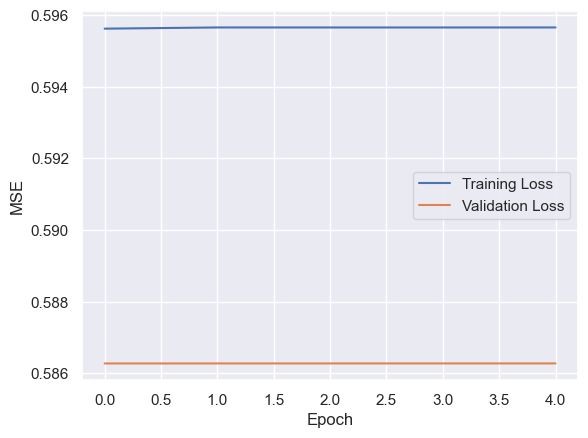

In [89]:
history= model.fit(X_train, y_train, epochs=5, validation_split=0.3)

# Plot learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


That brings us to the end of parametric models. But what about models that don't make explicit assumptions? Visit the next notebook to learn more!